<a href="https://colab.research.google.com/github/asab77/MAT-422/blob/main/Homework3_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

\section*{3.7.1 Mathematical Formulation}

In a neural network, the data is transformed as it passes through layers of nodes with associated weights and biases. The operations in a single-layer feedforward network with one hidden layer can be defined as follows:

\[
Z_1 = X \cdot W_1 + b_1
\]
\[
A_1 = f(Z_1)
\]
\[
Z_2 = A_1 \cdot W_2 + b_2
\]
\[
A_2 = f(Z_2)
\]

where:
\begin{itemize}
    \item \( X \) is the input matrix,
    \item \( W_1 \) and \( W_2 \) are the weight matrices for the hidden and output layers, respectively,
    \item \( b_1 \) and \( b_2 \) are the bias vectors,
    \item \( f \) represents the activation function applied at each layer, which introduces non-linearity into the network.
\end{itemize}

The output \( A_2 \) represents the final predictions of the neural network for given input \( X \).


In [12]:
import numpy as np

# Define input features
X = np.array([[0.5, 0.2, 0.1]])

# Initialize random weights and biases
W1 = np.random.rand(3, 4)  # weights for input to hidden layer (3 inputs, 4 neurons)
b1 = np.random.rand(1, 4)  # bias for hidden layer

W2 = np.random.rand(4, 1)  # weights for hidden to output layer (4 neurons to 1 output)
b2 = np.random.rand(1, 1)  # bias for output layer

print("W1:", W1)
print("b1:", b1)
print("W2:", W2)
print("b2:", b2)


W1: [[0.33655509 0.89151029 0.68420288 0.97839792]
 [0.26317566 0.24937026 0.1521037  0.37383354]
 [0.3068036  0.80459238 0.82240559 0.91616822]]
b1: [[0.04842704 0.85280417 0.51489315 0.79566348]]
W2: [[0.53793877]
 [0.21758611]
 [0.63591226]
 [0.88071496]]
b2: [[0.7136921]]


\section*{3.7.2 Activation Functions}

Activation functions introduce non-linearity to the neural network, enabling it to model complex patterns. The most commonly used activation functions include:

\begin{itemize}
    \item \textbf{Sigmoid:} Maps input values to a range between 0 and 1, defined as:
    \[
    \sigma(x) = \frac{1}{1 + e^{-x}}
    \]
    This function is useful for binary classification problems.
    
    \item \textbf{ReLU (Rectified Linear Unit):} Outputs the input if positive, otherwise zero. It is defined as:
    \[
    \text{ReLU}(x) = \max(0, x)
    \]
    ReLU helps to avoid the vanishing gradient problem in deep networks.
    
    \item \textbf{Tanh:} Maps input values to a range between -1 and 1, defined as:
    \[
    \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
    \]
    Tanh is commonly used in hidden layers as it centers the data, making optimization easier.
\end{itemize}

Each of these functions impacts the learning and convergence of the neural network differently.


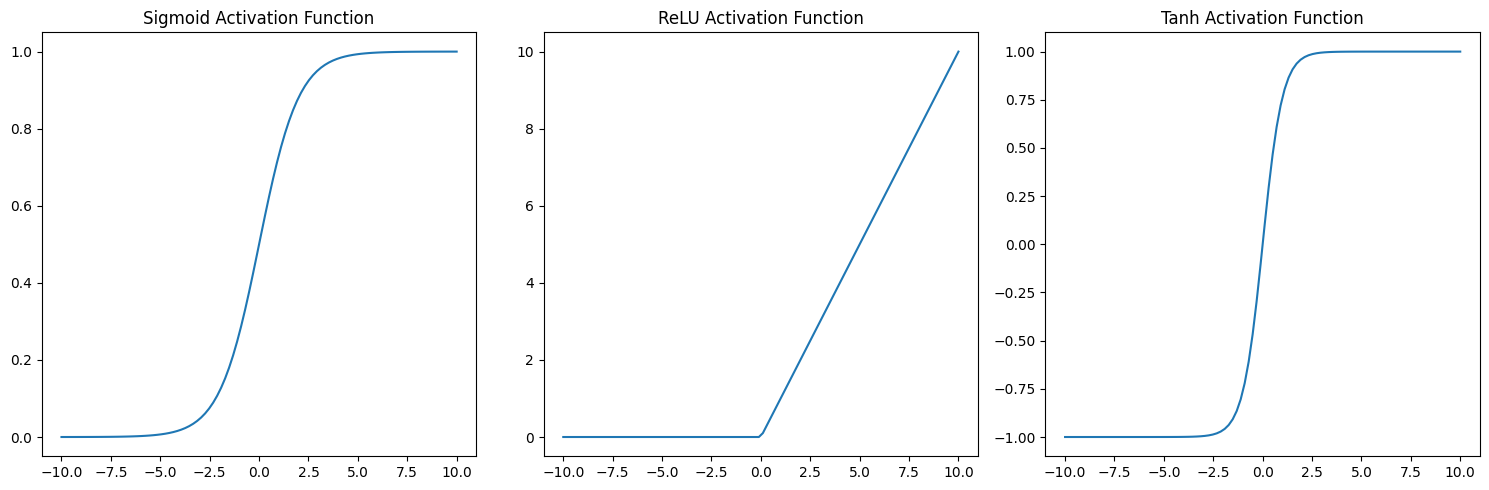

In [13]:
import matplotlib.pyplot as plt

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

# Plot the activation functions
x = np.linspace(-10, 10, 100)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(x, sigmoid(x))
plt.title("Sigmoid Activation Function")

plt.subplot(1, 3, 2)
plt.plot(x, relu(x))
plt.title("ReLU Activation Function")

plt.subplot(1, 3, 3)
plt.plot(x, tanh(x))
plt.title("Tanh Activation Function")

plt.tight_layout()
plt.show()


\section*{3.7.3 Cost Function}

The cost function quantifies the error between the network's predictions and the true values. A common cost function for binary classification is \textbf{binary cross-entropy}, given by:

\[
J(y, \hat{y}) = -\frac{1}{m} \sum_{i=1}^{m} \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right)
\]

where:
\begin{itemize}
    \item \( y \) is the true label,
    \item \( \hat{y} \) is the predicted output,
    \item \( m \) is the number of examples.
\end{itemize}

This function encourages the network to minimize the error by adjusting weights and biases.


In [14]:
# Binary Cross-Entropy Cost Function
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-15  # to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    cost = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    print("Cost:", cost)  # Display the cost
    return cost

# Example
y_true = np.array([[1]])
y_pred = np.array([[0.8]])
cost = binary_cross_entropy(y_true, y_pred)


Cost: 0.2231435513142097


\section*{3.7.4 Backpropagation}

Backpropagation is the process of calculating gradients of the cost function with respect to weights and biases in the network, enabling optimization through gradient descent. The process involves:

1. **Forward Pass:** Calculate the activations and predictions.
2. **Backward Pass:** Compute gradients for each layer from the output layer back to the input layer. The update rules for each layer's weights \( W \) and biases \( b \) are:

\[
\frac{\partial J}{\partial W} = \frac{1}{m} \cdot (A_{\text{prev}} \cdot \delta)^T
\]
\[
\frac{\partial J}{\partial b} = \frac{1}{m} \cdot \sum \delta
\]

where:
\begin{itemize}
    \item \( J \) is the cost function,
    \item \( \delta \) represents the error term,
    \item \( A_{\text{prev}} \) is the activation from the previous layer.
\end{itemize}

The gradients are used to adjust weights and biases to minimize the cost function.


In [15]:
# Define backpropagation function
def backpropagation(X, y, W1, b1, W2, b2, learning_rate=0.01):
    # Forward pass
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)

    # Backward pass
    dZ2 = A2 - y
    dW2 = np.dot(A1.T, dZ2) / X.shape[0]
    db2 = np.sum(dZ2, axis=0, keepdims=True) / X.shape[0]

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = np.dot(X.T, dZ1) / X.shape[0]
    db1 = np.sum(dZ1, axis=0, keepdims=True) / X.shape[0]

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    print("Updated W1:", W1)
    print("Updated b1:", b1)
    print("Updated W2:", W2)
    print("Updated b2:", b2)

    return W1, b1, W2, b2

# Test backpropagation step
W1, b1, W2, b2 = backpropagation(X, y_true, W1, b1, W2, b2)


Updated W1: [[0.33661115 0.89152475 0.68425693 0.97845566]
 [0.26319809 0.24937604 0.15212531 0.37385664]
 [0.30681481 0.80459527 0.8224164  0.91617976]]
Updated b1: [[0.04853917 0.8528331  0.51500124 0.79577897]]
Updated W2: [[0.53842858]
 [0.21827397]
 [0.63653048]
 [0.88140578]]
Updated b2: [[0.71454476]]


\section*{3.7.5 Backpropagation Algorithm}

The backpropagation algorithm optimizes the network by iteratively adjusting weights and biases to minimize the cost function. The algorithm follows these steps:

1. **Initialize** weights and biases randomly.
2. **For each epoch:**
   \begin{itemize}
       \item Perform a forward pass to compute the activations and cost.
       \item Execute the backward pass to calculate gradients of the cost function with respect to each weight and bias.
       \item Update weights and biases using the gradients and a learning rate \( \alpha \) as follows:
       \[
       W := W - \alpha \cdot \frac{\partial J}{\partial W}
       \]
       \[
       b := b - \alpha \cdot \frac{\partial J}{\partial b}
       \]
   \end{itemize}

3. **Repeat** until the cost function converges or the maximum number of epochs is reached.

By following this iterative process, the algorithm gradually reduces the error and improves the model's predictions.


Streaming output truncated to the last 5000 lines.
 [0.43896639]
 [0.83590927]
 [1.10377707]]
Updated b2: [[0.98768535]]
Cost: 0.037290918200900004
Epoch 500, Cost: 0.037290918200900004
Updated W1: [[0.35716328 0.89848945 0.70408325 0.9989767 ]
 [0.27141894 0.25216192 0.16005585 0.38206506]
 [0.31092523 0.80598821 0.82638166 0.92028397]]
Updated b1: [[0.08964342 0.8667625  0.55465389 0.83682105]]
Updated W2: [[0.69725742]
 [0.43926271]
 [0.83617839]
 [1.10407659]]
Updated b2: [[0.98805139]]
Cost: 0.03724641892322146
Updated W1: [[0.35719417 0.89850183 0.70411301 0.99900671]
 [0.2714313  0.25216688 0.16006775 0.38207706]
 [0.31093141 0.80599069 0.82638762 0.92028997]]
Updated b1: [[0.0897052  0.86678726 0.55471341 0.83688107]]
Updated W2: [[0.69747221]
 [0.43955869]
 [0.8364472 ]
 [1.10437577]]
Updated b2: [[0.988417]]
Cost: 0.03720202196367846
Updated W1: [[0.35722503 0.8985142  0.70414274 0.99903669]
 [0.27144364 0.25217183 0.16007964 0.38208905]
 [0.31093758 0.80599316 0.82639356 0.9

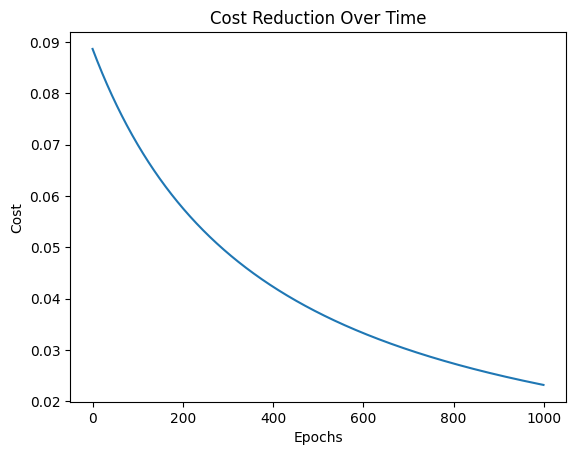

In [16]:
def train_neural_network(X, y, W1, b1, W2, b2, epochs=1000, learning_rate=0.01):
    cost_history = []  # To store cost history

    for epoch in range(epochs):
        # Backpropagation step
        W1, b1, W2, b2 = backpropagation(X, y, W1, b1, W2, b2, learning_rate)

        # Calculate cost for current predictions
        Z1 = np.dot(X, W1) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(A1, W2) + b2
        A2 = sigmoid(Z2)
        cost = binary_cross_entropy(y, A2)
        cost_history.append(cost)

        # Print cost every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Cost: {cost}")

    # Plot cost history
    plt.plot(range(epochs), cost_history)
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.title("Cost Reduction Over Time")
    plt.show()

    return W1, b1, W2, b2

# Run training
W1, b1, W2, b2 = train_neural_network(X, y_true, W1, b1, W2, b2)
